Calculate the yield of the 11 selected bonds (ytm). Then provide a welllabeled plot with a 5-year yield curve (ytm curve) corresponding to each day of data superimposed on-top of each other.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
bond_prices = np.array([
              [99.63,99.64,99.65,99.66,99.67,99.69,99.68,99.68,99.71,99.72,99.72],
              [97.96,97.98,97.99,97.98,98.02,98.05,97.97,97.98,98,98.01,98.03],
              [96.46,96.48,96.55,96.58,96.66,96.72,96.54,96.45,96.5,96.46,96.46],
              [98.19,98.20,98.26,98.25,98.31,98.31,98.21,98.02,97.98,97.97,97.9],
              [98.27,98.28,98.37,98.35,98.43,98.44,98.3,98.05,98,97.99,97.93],
              [93.46,93.44,93.55,93.53,93.6,93.57,93.4,93.12,93.08,93.07,93],
              [93.28,93.30,93.25,93.19,93.47,93.49,93.14,92.86,92.75,92.76,92.83],
              [97.58,97.59,97.6,97.52,97.74,97.77,97.44,97.09,96.96,96.95,96.94],
              [100.5,100.48,100.44,100.33,100.64,100.67,100.22,99.83,99.66,99.62,99.67],
              [99.74,99.72,99.72,99.55,99.88,99.91,99.44,98.99,98.81,98.77,98.83],
              [103.41,103.38,103.28,103.13,103.54,103.55,102.97,102.48,102.28,102.24,102.41]
              ]).transpose()  # each row is a day's price
terms = [1/6 + i*0.5 for i in range(11)]
days = ["Jan 8", "Jan 9", "Jan 10", "Jan 11", "Jan 12", "Jan 15", "Jan 16", "Jan 17", "Jan 18", "Jan 19", "Jan 22"]
coupons = np.array([0.0225,0.015,0.0125,0.03,0.03,0.01,0.0125,0.0275,0.0350,0.0325,0.0400])

In [7]:
def YTM(present_values, coupons):
  # Yield to Maturity (YTM) = [Annual Coupon + (FV – PV) ÷ Number of Compounding Periods)] ÷ [(FV + PV) ÷ 2]
  # Face value is always 100
  n_periods = len(present_values)
  annual_coupons = coupons * 1/2 * 100 # semi annual coupons
  ytm = (annual_coupons + (100-present_values)/n_periods) / (1/2 * (present_values+100))
  return ytm

In [8]:
ytms = []
for i, present_values in enumerate(bond_prices):
  ytm = YTM(present_values, coupons)
  print(f"yields for {days[i]}: {ytm}")
  ytms.append(ytm)

yields for Jan 8: [0.01160784 0.00945095 0.00963879 0.01679747 0.01671733 0.01131547
 0.01278879 0.01614536 0.01700295 0.01650782 0.01661669]
yields for Jan 9: [0.01159815 0.00943162 0.0096193  0.01678745 0.01670732 0.01133544
 0.01276866 0.01613534 0.01702278 0.01652768 0.01664596]
yields for Jan 10: [0.01158846 0.00942196 0.00955112 0.01672735 0.01661725 0.01122566
 0.01281901 0.01612532 0.01706246 0.01652768 0.01674359]
yields for Jan 11: [0.01157877 0.00943162 0.00952192 0.01673736 0.01663726 0.01124561
 0.01287945 0.01620549 0.01717167 0.01669666 0.01689021]
yields for Jan 12: [0.01156909 0.00939299 0.00944408 0.01667729 0.01655725 0.01117581
 0.01259768 0.01598518 0.01686422 0.01636891 0.01648995]
yields for Jan 15: [0.01154972 0.00936403 0.00938574 0.01667729 0.01654725 0.01120572
 0.01257758 0.01595517 0.01683451 0.01633917 0.0164802 ]
yields for Jan 16: [0.0115594  0.00944128 0.00956086 0.01677743 0.0166873  0.01137539
 0.01292986 0.01628573 0.01728099 0.01680615 0.01704685]
y

<ipython-input-50-b3ced3d281d8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


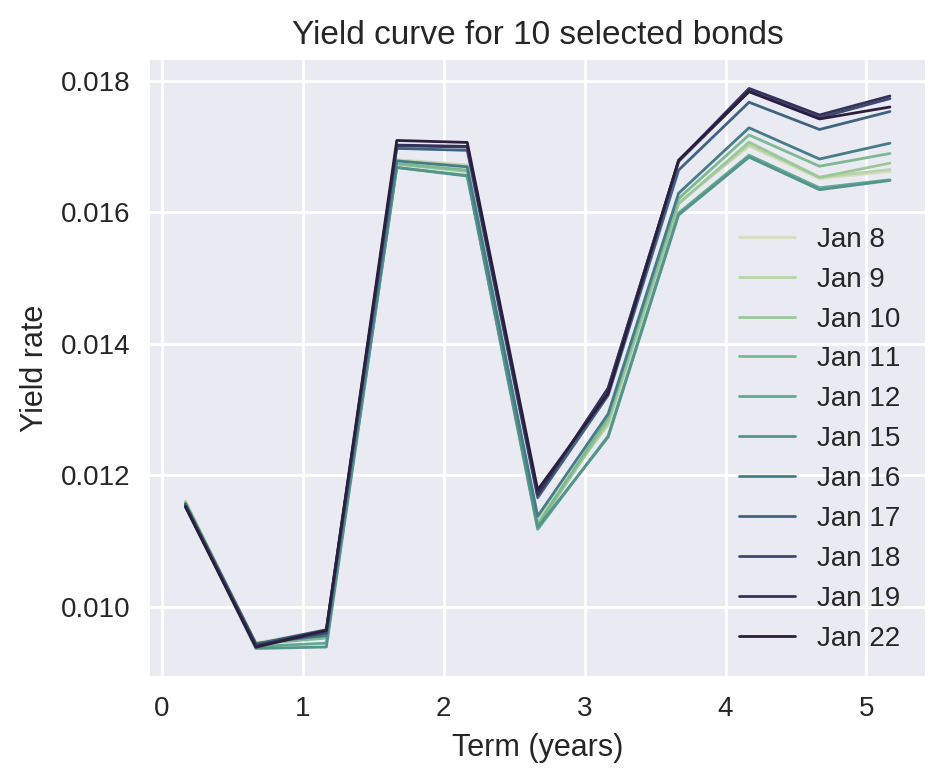

In [50]:
# plot the ytm curve for each day
colors = ['#d6debf', '#bad3a8', '#9bc799', '#7db991', '#64a88d', '#53948c', '#467c89', '#3f6380', '#3b4a71', '#35325a', '#2b1e3e']
plt.style.use('seaborn')
plt.figure(figsize=(5,4), dpi=200)
for i, rates in enumerate(ytms):
    plt.plot(terms, rates, label=f"{days[i]}", linewidth=1, color=colors[i])
plt.xlabel("Term (years)")
plt.ylabel("Yield rate")
plt.title("Yield curve for 10 selected bonds")
plt.legend()
plt.show()

 Write a pseudo-code (explanation of an algorithm) for how you would derive the spot curve with terms ranging from 1-5 years from your chosen bonds in part 2. (Please recall the day convention simplifications provided in part 2 as well.) Then provide a well-labeled plot with a 5-year spot curve corresponding to each day of data superimposed on-top of each other

In [10]:
!pip install sympy

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# we use this package for solving our yield curve equation simpler
from sympy import Eq, solve, exp
from sympy.abc import r

In [16]:
bond_prices = np.array([
              [99.63,99.64,99.65,99.66,99.67,99.69,99.68,99.68,99.71,99.72,99.72],
              [97.96,97.98,97.99,97.98,98.02,98.05,97.97,97.98,98,98.01,98.03],
              [96.46,96.48,96.55,96.58,96.66,96.72,96.54,96.45,96.5,96.46,96.46],
              [98.19,98.20,98.26,98.25,98.31,98.31,98.21,98.02,97.98,97.97,97.9],
              [98.27,98.28,98.37,98.35,98.43,98.44,98.3,98.05,98,97.99,97.93],
              [93.46,93.44,93.55,93.53,93.6,93.57,93.4,93.12,93.08,93.07,93],
              [93.28,93.30,93.25,93.19,93.47,93.49,93.14,92.86,92.75,92.76,92.83],
              [97.58,97.59,97.6,97.52,97.74,97.77,97.44,97.09,96.96,96.95,96.94],
              [100.5,100.48,100.44,100.33,100.64,100.67,100.22,99.83,99.66,99.62,99.67],
              [99.74,99.72,99.72,99.55,99.88,99.91,99.44,98.99,98.81,98.77,98.83],
              [103.41,103.38,103.28,103.13,103.54,103.55,102.97,102.48,102.28,102.24,102.41],
              ]).transpose()  # each row is a day's price
terms = [1/6 + i*0.5 for i in range(11)]  # we simplify the term by assuming today is Jan 1st
days = ["Jan 8", "Jan 9", "Jan 10", "Jan 11", "Jan 12", "Jan 15", "Jan 16", "Jan 17", "Jan 18", "Jan 19", "Jan 22"]
coupons = np.array([0.0225,0.015,0.0125,0.03,0.03,0.01,0.0125,0.0275,0.0350,0.0325,0.0400])

In [17]:
def get_spot_rate(dirty_prices, terms, coupons, DEBUG=False):
    # always assume only the first term is zero coupon bond
    rates = []
    for i, t in enumerate(terms):
      dp = dirty_prices[i]
      coup = coupons[i]
      coupon_payment = coup*100*0.5
      if i > 0:
        constant = sum(coupon_payment*exp(-past_r*past_t) for (past_r,past_t) in zip(rates, terms[:i]))
      else:
        constant = 0
      eqn = Eq(dp, constant + (100+coupon_payment)*exp(-r*t))
      solution = solve(eqn, r, dict=True)[0][r]
      rates.append(solution)
      if DEBUG:
        print(f"solving {dp} = {constant} + (100+{coupon_payment})*exp(-r*{t})")
        print(f"got solution = {solution}")
    return rates


In [18]:
# DEBUG with the class example
get_spot_rate(dirty_prices=[101.5,103.88], terms=[0.25, 0.75], coupons=[0.04,0.06], DEBUG=True)

solving 101.5 = 0 + (100+2.0)*exp(-r*0.25)
got solution = 0.0196560592097162
solving 103.88 = 2.98529411764706 + (100+3.0)*exp(-r*0.75)
got solution = 0.0275353749366456


[0.0196560592097162, 0.0275353749366456]

In [19]:
all_rates = []
for i, day_price in enumerate(bond_prices):
    # we always assume today is Jan 1st, which is 122 days from Sep 1st.
    dirty_prices = day_price + 122/365 * coupons * 100
    rates = get_spot_rate(dirty_prices, terms, coupons)
    all_rates.append(rates)
    print(f"Log {days[i]}:")
    print(f"day price of 10 bonds: {day_price}")
    print(f"dirty price of 10 bonds: {dirty_prices}")
    print(f"spot rates for 10 terms: {rates}")
    print("#"*30)

Log Jan 8:
day price of 10 bonds: [ 99.63  97.96  96.46  98.19  98.27  93.46  93.28  97.58 100.5   99.74
 103.41]
dirty price of 10 bonds: [100.38205479  98.46136986  96.87780822  99.19273973  99.27273973
  93.79424658  93.69780822  98.49917808 101.66986301 100.82630137
 104.7469863 ]
spot rates for 10 terms: [0.0442435272166302, 0.0458518249180260, 0.0434505672673410, 0.0408276930059848, 0.0378825240815635, 0.0355511542511747, 0.0347168969858322, 0.0341005596667230, 0.0331557610157522, 0.0325724808145456, 0.0321839771471816]
##############################
Log Jan 9:
day price of 10 bonds: [ 99.64  97.98  96.48  98.2   98.28  93.44  93.3   97.59 100.48  99.72
 103.38]
dirty price of 10 bonds: [100.39205479  98.48136986  96.89780822  99.20273973  99.28273973
  93.77424658  93.71780822  98.50917808 101.64986301 100.80630137
 104.7169863 ]
spot rates for 10 terms: [0.0436458405908753, 0.0455459851838479, 0.0432730246012990, 0.0407691048444949, 0.0378374948231350, 0.0356345953821844, 0.034

<ipython-input-52-97e3646501b9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


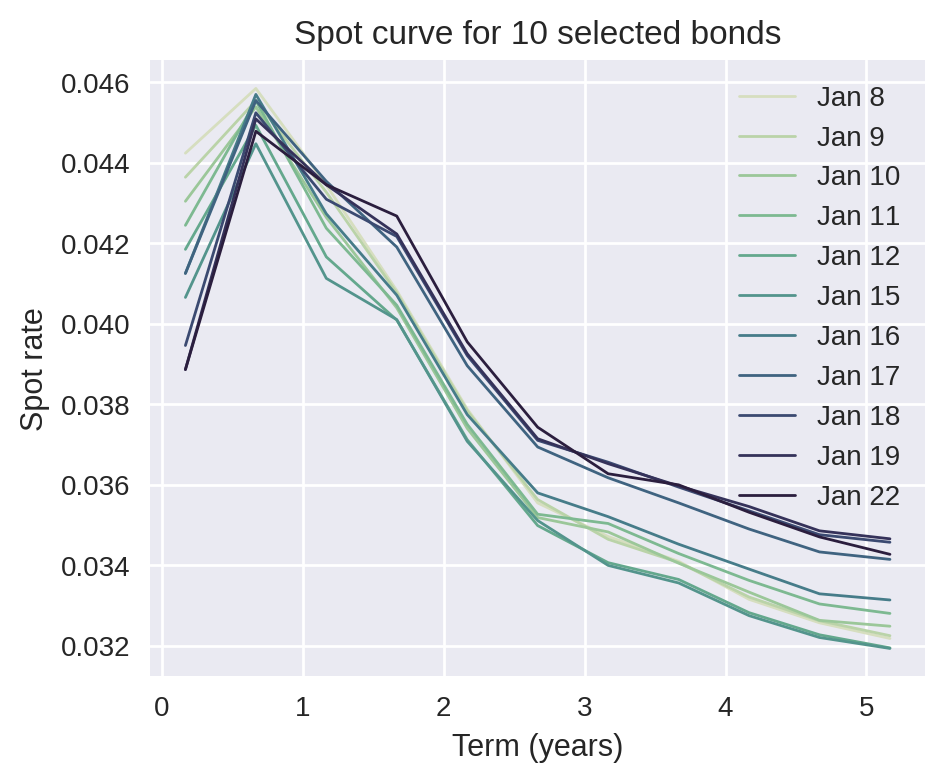

In [52]:
# plot the spot curve for each day
colors = ['#d6debf', '#bad3a8', '#9bc799', '#7db991', '#64a88d', '#53948c', '#467c89', '#3f6380', '#3b4a71', '#35325a', '#2b1e3e']
plt.style.use('seaborn')
plt.figure(figsize=(5,4), dpi=200)
for i, rates in enumerate(all_rates):
    plt.plot(terms, rates, label=f"{days[i]}", linewidth=1, color=colors[i])
plt.xlabel("Term (years)")
plt.ylabel("Spot rate")
plt.title("Spot curve for 10 selected bonds")
plt.legend()
plt.show()


 Write a pseudo-code for how you would derive the 1-year forward curve with terms ranging from 2-5 years from your chosen bonds in part 2 (I.e., a curve with the first point being the 1yr-1yr forward rate and the last point being the 1yr-4yr rate). Then provide a well-labeled plot with a forward curve corresponding to each day of data superimposed on-top of each other

In [27]:
print(terms)

[0.16666666666666666, 0.6666666666666666, 1.1666666666666667, 1.6666666666666667, 2.1666666666666665, 2.6666666666666665, 3.1666666666666665, 3.6666666666666665, 4.166666666666667, 4.666666666666667, 5.166666666666667]


In [28]:
def get_forward_rate(spot_rate, terms, base_index, forward_indices, t0):
    # base index is the term you calculate forward rate on
    # forward indices are the term you will calculate the forward rate
    r_b = spot_rate[base_index]
    t_b = terms[base_index]
    forward_rates = []
    for i in forward_indices:
      r_a = spot_rate[i]
      t_a = terms[i]
      # f_r = (1+r_a)**t_a/(1+r_b)**t_b - 1
      # print(r_b, t_b, r_a, t_a, t0)
      f_r = (r_a*(t_a-t0)-r_b*(t_b-t0)) / (t_a-t_b)
      forward_rates.append(f_r)
    return forward_rates

In [29]:
forward_rates = []
base_index = 2
forward_indices = [4,6,8,10]
t0=terms[0]
for i, spot_rate in enumerate(all_rates):
  forward_rate = get_forward_rate(spot_rate, terms, base_index, forward_indices, t0)
  forward_rates.append(forward_rate)
  print(f"forward rate for {days[i]}: {forward_rate}")

forward rate for Jan 8: [0.0323144808957859, 0.0303500618450779, 0.0297241589318893, 0.0293673296171417]
forward rate for Jan 9: [0.0324019650449710, 0.0303353064475963, 0.0298603547816482, 0.0294976801178500]
forward rate for Jan 10: [0.0321615298793798, 0.0309221800945392, 0.0302321730878341, 0.0299483818854030]
forward rate for Jan 11: [0.0326302109388981, 0.0313712660343507, 0.0307094389070452, 0.0304127399773781]
forward rate for Jan 12: [0.0325818257505903, 0.0302680845504299, 0.0298789179126638, 0.0295206431107570]
forward rate for Jan 15: [0.0330327272642670, 0.0304328177635140, 0.0299569906099490, 0.0296365172038656]
forward rate for Jan 16: [0.0327547129974315, 0.0314469296628679, 0.0309647233405884, 0.0307409255289201]
forward rate for Jan 17: [0.0343791719287947, 0.0324935242426392, 0.0320232075087932, 0.0318000580597957]
forward rate for Jan 18: [0.0353278890875709, 0.0332961020134945, 0.0327734862670867, 0.0324438979771833]
forward rate for Jan 19: [0.0350630143174961, 0.

<ipython-input-54-0febc2e526b8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


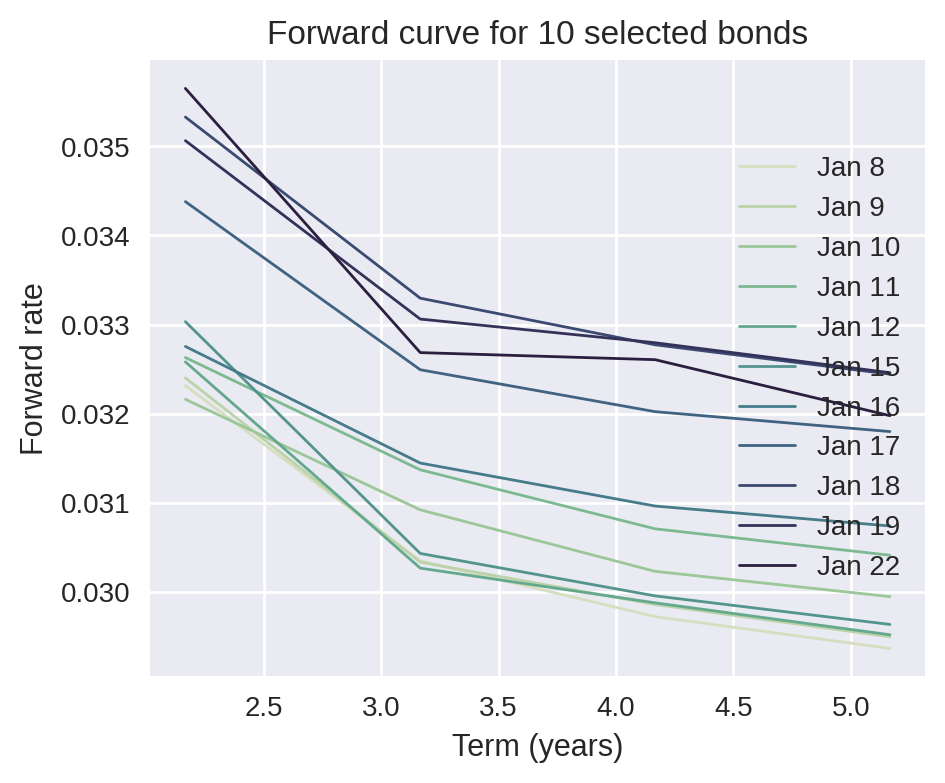

In [54]:
# plot the spot curve for each day
colors = ['#d6debf', '#bad3a8', '#9bc799', '#7db991', '#64a88d', '#53948c', '#467c89', '#3f6380', '#3b4a71', '#35325a', '#2b1e3e']
plt.style.use('seaborn')
plt.figure(figsize=(5,4), dpi=200)
for i, rates in enumerate(forward_rates):
    plt.plot([terms[k] for k in forward_indices], rates, label=f"{days[i]}", linewidth=1, color=colors[i])
plt.xlabel("Term (years)")
plt.ylabel("Forward rate")
plt.title("Forward curve for 10 selected bonds")
plt.legend(loc='right')
plt.show()

Calculate two covariance matrices for the time series of daily log-returns of yield, and forward rates (no spot rates)

In [31]:
import math
ytms = [list(ytm) for ytm in ytms]
print(ytms)
print(forward_rates)

[[0.011607838136916938, 0.009450945094509458, 0.009638788372372824, 0.016797471664013873, 0.01671733219622462, 0.01131547042846537, 0.012788794400963274, 0.016145358841988058, 0.01700294717751077, 0.016507823807313148, 0.01661668551202006], [0.011598149396185862, 0.009431623028956088, 0.009619299674267097, 0.016787450692597006, 0.01670731930969978, 0.011335438754793597, 0.012768659173211684, 0.016135339937151768, 0.017022781687586155, 0.016527684212442877, 0.01664595606969489], [0.01158846162602736, 0.009421963460046196, 0.009551120464374093, 0.01672734609282576, 0.016617248759205703, 0.01122566402855734, 0.012819005057038693, 0.016125322046374683, 0.017062462582318902, 0.016527684212442877, 0.016743586991520874], [0.011578774826295615, 0.009431623028956088, 0.009521915666996552, 0.016737360999656083, 0.016637257373329977, 0.011245613787855298, 0.012879454517220447, 0.016205493574873896, 0.017171666749862733, 0.01669665839046947, 0.016890213611525092], [0.01156908899684479, 0.009392990

In [32]:
def rate_to_log_return(rates):
  # first transpose the rates
  rates_np = np.array(rates).T
  log_return = []
  for rate in rates_np:
    logr0 = math.log(rate[0])
    #print(logr0, rate)
    temp = [math.log(r) - logr0 for r in rate[1:]]
    log_return.append(temp)

  return log_return

def compute_covariance(log_return):
  log_return = np.array(log_return)
  return np.cov(log_return)

In [33]:
ytms_log_return = rate_to_log_return(ytms)
forward_rates_log_return = rate_to_log_return(forward_rates)

In [34]:
print(len(ytms_log_return))
# ignore the half years as we want X1...X5, hence
ytms_log_return = [ytms_log_return[2*i] for i in range(len(ytms_log_return)//2)]
print(len(ytms_log_return))

11
5


In [35]:
print(len(forward_rates_log_return))

4


In [36]:
ytms_log_return_cov = compute_covariance(ytms_log_return)
print(ytms_log_return_cov)

[[ 5.58639192e-06 -5.39780801e-06 -2.03452841e-05 -3.53756177e-05
  -4.27460918e-05]
 [-5.39780801e-06  8.65812065e-05  9.05135580e-05  1.70106136e-04
   1.77171089e-04]
 [-2.03452841e-05  9.05135580e-05  1.40696032e-04  2.51227614e-04
   2.78300461e-04]
 [-3.53756177e-05  1.70106136e-04  2.51227614e-04  4.90742758e-04
   5.30071194e-04]
 [-4.27460918e-05  1.77171089e-04  2.78300461e-04  5.30071194e-04
   5.81250752e-04]]


In [37]:
forward_rates_log_return_cov = compute_covariance(forward_rates_log_return)
print(forward_rates_log_return_cov)

[[0.00159231 0.00132502 0.0014937  0.00144239]
 [0.00132502 0.00135352 0.00145232 0.00144439]
 [0.0014937  0.00145232 0.00158525 0.00156347]
 [0.00144239 0.00144439 0.00156347 0.00155386]]


 Calculate the eigenvalues and eigenvectors of both covariance matrice

In [ ]:
def top5eigen(cov_matrix):
  # Calculate eigenvalues and eigenvectors
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  # Sort the eigenvalues and eigenvectors by largest eigenvalue
  idx = eigenvalues.argsort()[::-1]   # indices for sorting in descending order
  sorted_eigenvalues = eigenvalues[idx]
  sorted_eigenvectors = eigenvectors[:,idx]

  # Take the first 5 (in this case, it's all of them since we only have 5)
  first_5_eigenvalues = sorted_eigenvalues[:5]
  first_5_eigenvectors = sorted_eigenvectors[:,:5]
  eigenvalues_sum = sum(eigenvalues)

  return first_5_eigenvalues, first_5_eigenvectors, eigenvalues_sum

In [ ]:
first_5_eigenvalues, first_5_eigenvectors, eigenvalues_sum = top5eigen(ytms_log_return_cov)
print(f"Top 5 eigenvalues: {first_5_eigenvalues}")
print(f"Top 5 relative percentage {list(100*first_5_eigenvalues/eigenvalues_sum)} %")
print(f"Top 5 eigenvectors: {first_5_eigenvectors}")

Top 5 eigenvalues: [1.44807872e-03 3.61913965e-05 1.15575387e-05 1.20130509e-06
 1.30431109e-07]
Top 5 relative percentage [96.72174707706871, 2.417337580411521, 0.7719644792660294, 0.08023895789844385, 0.008711905355294931] %
Top 5 eigenvectors: [[-0.04773874  0.26869469 -0.1962138  -0.41124334 -0.84729171]
 [ 0.2150803   0.9164672   0.05657949  0.31256824  0.1137022 ]
 [ 0.3290019   0.03342578  0.80830063 -0.4854389   0.04049251]
 [ 0.60584583  0.01286297 -0.54839649 -0.4743478   0.32717094]
 [ 0.69005077 -0.29429286  0.06488675  0.5220376  -0.40060967]]


In [ ]:
first_5_eigenvalues, first_5_eigenvectors, eigenvalues_sum = top5eigen(forward_rates_log_return_cov)
print(f"Top 5 eigenvalues: {first_5_eigenvalues}")
print(f"Top 5 relative percentage {list(100*first_5_eigenvalues/eigenvalues_sum)} %")
print(f"Top 5 eigenvectors: {first_5_eigenvectors}")

Top 5 eigenvalues: [3.61029675e-03 9.33925218e-05 4.16865298e-05 1.84855664e-06]
Top 5 relative percentage [96.3458924458221, 2.4923119875002744, 1.1124642091949684, 0.04933135748264307] %
Top 5 eigenvectors: [[ 0.38345322  0.91341716  0.07382965  0.1148125 ]
 [ 0.49581985 -0.1094413  -0.82246871 -0.25637959]
 [ 0.52114648 -0.18203738  0.53718555 -0.63773069]
 [ 0.57925181 -0.34720901  0.17183156  0.7172079 ]]
